<a href="https://colab.research.google.com/github/Faysal3010/Machine-Learning-Specialized-/blob/main/Lab_Final_(221_35_)HANDWRITTEN_DIGIT_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question Ans 1

## HANDWRITTEN_DIGIT_CLASSIFICATION

### ID : 221-35-

---



### Data Loading


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Load MNIST from TensorFlow Datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Data Exploration


In [3]:
print("Training samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0])
print("Image shape:", x_train.shape[1:])
print("Target classes:", np.unique(y_train))

Training samples: 60000
Test samples: 10000
Image shape: (28, 28)
Target classes: [0 1 2 3 4 5 6 7 8 9]


 ### Data Visualization


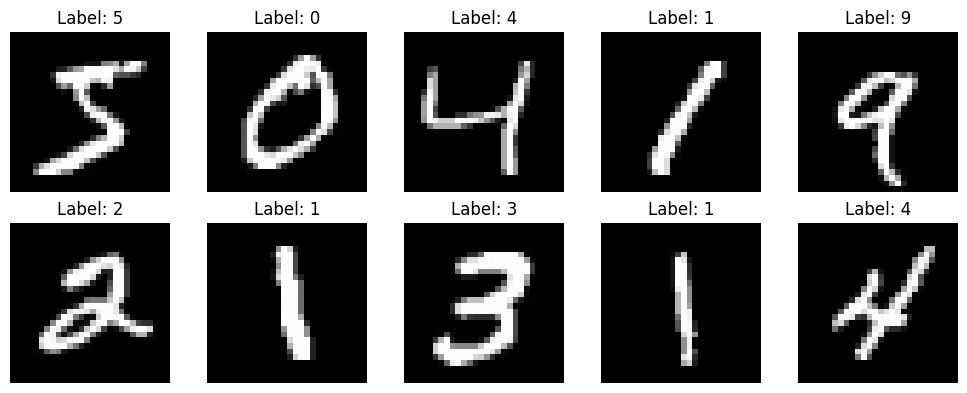

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Data Preprocessing


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Flatten images
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Normalize
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

### Model Training


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Train models
log_model = LogisticRegression(max_iter=1000)
svm_model = SVC()
tree_model = DecisionTreeClassifier()

log_model.fit(x_train_scaled, y_train)
svm_model.fit(x_train_scaled, y_train)
tree_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

def evaluate_model(model, X_train, y_train, X_test, y_test, title="Model"):

    #  Training Predictions & Metrics
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='macro', zero_division=0)
    train_rec  = recall_score(y_train, y_train_pred, average='macro', zero_division=0)
    train_f1   = f1_score(y_train, y_train_pred, average='macro', zero_division=0)

    #  Testing Predictions & Metrics
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
    test_rec  = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
    test_f1   = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

    #  Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix — {title}")
    plt.show()

    #  Classification Report
    print(f"\n {title} Classification Report (Test):\n")
    print(classification_report(y_test, y_test_pred, zero_division=0))

    #  Return all metrics in dictionary
    return {
        "Train Accuracy": train_acc,
        "Train Precision": train_prec,
        "Train Recall": train_rec,
        "Train F1": train_f1,
        "Test Accuracy": test_acc,
        "Test Precision": test_prec,
        "Test Recall": test_rec,
        "Test F1": test_f1
    }


 Evaluating: Logistic Regression


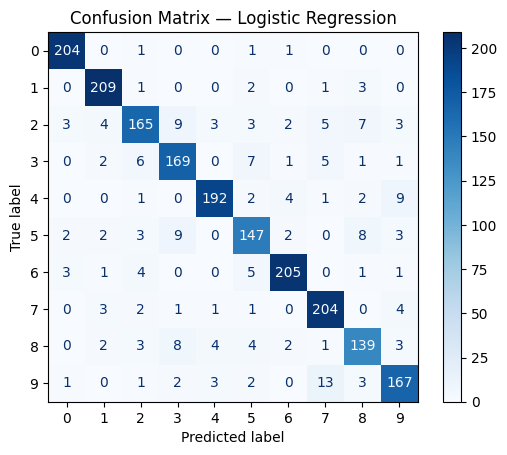


 Logistic Regression Classification Report (Test):

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       207
           1       0.94      0.97      0.95       216
           2       0.88      0.81      0.84       204
           3       0.85      0.88      0.87       192
           4       0.95      0.91      0.93       211
           5       0.84      0.84      0.84       176
           6       0.94      0.93      0.94       220
           7       0.89      0.94      0.91       216
           8       0.85      0.84      0.84       166
           9       0.87      0.87      0.87       192

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000


 Evaluating: SVM


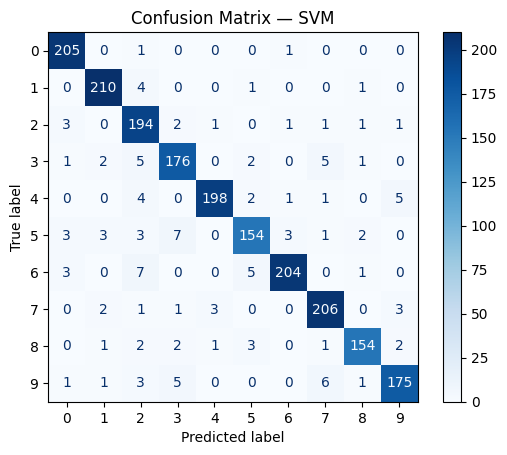


 SVM Classification Report (Test):

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       207
           1       0.96      0.97      0.97       216
           2       0.87      0.95      0.91       204
           3       0.91      0.92      0.91       192
           4       0.98      0.94      0.96       211
           5       0.92      0.88      0.90       176
           6       0.97      0.93      0.95       220
           7       0.93      0.95      0.94       216
           8       0.96      0.93      0.94       166
           9       0.94      0.91      0.93       192

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000


 Evaluating: Decision Tree


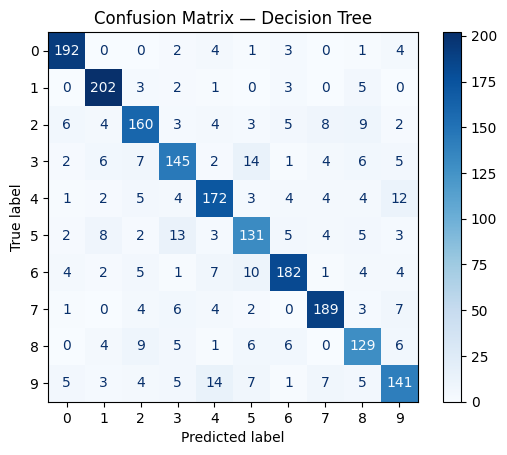


 Decision Tree Classification Report (Test):

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       207
           1       0.87      0.94      0.90       216
           2       0.80      0.78      0.79       204
           3       0.78      0.76      0.77       192
           4       0.81      0.82      0.81       211
           5       0.74      0.74      0.74       176
           6       0.87      0.83      0.85       220
           7       0.87      0.88      0.87       216
           8       0.75      0.78      0.77       166
           9       0.77      0.73      0.75       192

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000


 Model Comparison Table:


,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
Logistic Regression,0.9995,0.9995,0.9995,0.9995,0.9005,0.8975,0.8971,0.8969
SVM,0.9830,0.9830,0.9830,0.9830,0.9380,0.9384,0.9364,0.9370
Decision Tree,1.0000,1.0000,1.0000,1.0000,0.8215,0.8169,0.8175,0.8170


In [24]:
import pandas as pd

# Dictionary to store evaluation results
results = {}

# Create a dictionary of the trained models
trained_models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "Decision Tree": tree_model
}

#  Loop through each model in trained_models
for name, model in trained_models.items():
    print(f"\n Evaluating: {name}")
    metrics = evaluate_model(model, x_train_scaled, y_train, x_test_scaled, y_test, title=name)
    results[name] = metrics

#  Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T  # Transpose for better readability
results_df = results_df.round(4)      # Optional: round metrics for cleaner display

#  Display the DataFrame
print("\n Model Comparison Table:")
display(results_df)

### Hyperparameter Optimization


In [17]:
from sklearn.model_selection import GridSearchCV

# Example for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid, cv=3)
grid_svm.fit(x_train_scaled, y_train)
print("Best SVM params:", grid_svm.best_params_)

Best SVM params: {'C': 10, 'kernel': 'rbf'}


### Training Evaluation


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_train = log_model.predict(x_train_scaled)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[794   0   0   0   0   0   0   0   0   0]
 [  0 910   0   0   0   0   0   0   0   1]
 [  0   0 787   0   0   0   0   0   0   0]
 [  0   0   0 840   0   0   0   0   0   0]
 [  0   0   0   0 769   0   0   0   0   0]
 [  0   0   0   1   0 686   0   0   0   0]
 [  0   0   0   0   0   0 794   0   0   0]
 [  0   0   0   0   0   0   0 854   0   0]
 [  0   0   0   1   0   0   0   0 777   0]
 [  0   0   0   0   0   0   0   1   0 785]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       794
           1       1.00      1.00      1.00       911
           2       1.00      1.00      1.00       787
           3       1.00      1.00      1.00       840
           4       1.00      1.00      1.00       769
           5       1.00      1.00      1.00       687
           6       1.00      1.00      1.00       794
           7       1.00      1.00      1.00       854
           8       1.00      1.00      1.00       778
           9       1.00     

### Testing Evaluation with Bootstrapping


In [19]:
from sklearn.utils import resample

def bootstrap_metrics(model, x_test, y_test, n_iterations=100):
    accs, precs, recalls = [], [], []
    for _ in range(n_iterations):
        x_sample, y_sample = resample(x_test, y_test)
        y_pred = model.predict(x_sample)
        report = classification_report(y_sample, y_pred, output_dict=True, zero_division=0)
        accs.append(report['accuracy'])
        precs.append(report['weighted avg']['precision'])
        recalls.append(report['weighted avg']['recall'])
    return np.mean(accs), np.std(accs), np.mean(precs), np.mean(recalls)

acc, acc_std, prec, rec = bootstrap_metrics(log_model, x_test_scaled, y_test)
print(f"Accuracy: {acc:.3f} ± {acc_std:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}")

Accuracy: 0.901 ± 0.007, Precision: 0.901, Recall: 0.901


 ### Model Comparison

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_model(model, x_train, y_train, x_test, y_test, name):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    train_prec = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    test_prec = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)

    train_rec = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
    test_rec = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)

    print(f"\n {name} Performance:")
    print(f"Training Accuracy: {train_acc:.4f}, Precision: {train_prec:.4f}, Recall: {train_rec:.4f}")
    print(f"Testing Accuracy:  {test_acc:.4f}, Precision: {test_prec:.4f}, Recall: {test_rec:.4f}")

    if train_acc - test_acc > 0.1:
        print(" Overfitting detected")
    elif train_acc < 0.7 and test_acc < 0.7:
        print(" Underfitting detected")
    else:
        print(" Model is generalizing well")

# Evaluate all models
evaluate_model(log_model, x_train_scaled, y_train, x_test_scaled, y_test, "Logistic Regression")
evaluate_model(svm_model, x_train_scaled, y_train, x_test_scaled, y_test, "SVM")
evaluate_model(tree_model, x_train_scaled, y_train, x_test_scaled, y_test, "Decision Tree")


 Logistic Regression Performance:
Training Accuracy: 0.9995, Precision: 0.9995, Recall: 0.9995
Testing Accuracy:  0.9005, Precision: 0.9004, Recall: 0.9005
 Model is generalizing well

 SVM Performance:
Training Accuracy: 0.9830, Precision: 0.9830, Recall: 0.9830
Testing Accuracy:  0.9380, Precision: 0.9390, Recall: 0.9380
 Model is generalizing well

 Decision Tree Performance:
Training Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
Testing Accuracy:  0.8215, Precision: 0.8209, Recall: 0.8215
 Overfitting detected
